## Load Data

In [1]:
import pickle
import numpy as np

In [15]:
data_dict = pickle.load(open("fake_account_preprocessed.dat", "rb"))
X_train = data_dict["train_data"]
y_train = data_dict["train_labels"]
X_test  = data_dict["test_data"]
y_test = data_dict["test_labels"]

## TSNE

In [3]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=700)

In [13]:
tsne_data = tsne.fit_transform(X_train)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4777 samples in 0.032s...
[t-SNE] Computed neighbors for 4777 samples in 0.229s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4777
[t-SNE] Computed conditional probabilities for sample 2000 / 4777
[t-SNE] Computed conditional probabilities for sample 3000 / 4777
[t-SNE] Computed conditional probabilities for sample 4000 / 4777
[t-SNE] Computed conditional probabilities for sample 4777 / 4777
[t-SNE] Mean sigma: 0.000023
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.255280
[t-SNE] Error after 700 iterations: 0.668997


In [8]:
from pandas import Timestamp
from ggplot import *

/home/aviral/anaconda3/envs/FNC/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [9]:
import pandas as pd
df_tsne = pd.DataFrame()

In [10]:
df_tsne['x-tsne'] = tsne_data[:,0]
df_tsne['y-tsne'] = tsne_data[:,1]
df_tsne['label'] = y_train

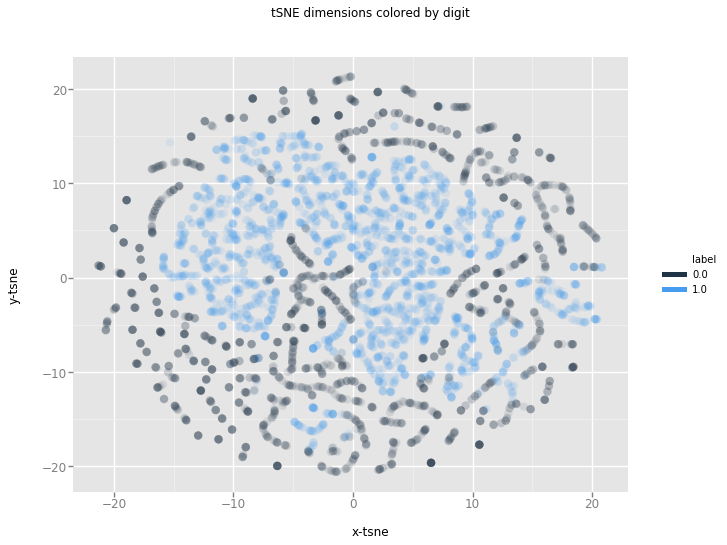

<ggplot: (8738062965845)>

In [11]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

## Spectral-Clustering

In [19]:
from sklearn.cluster import SpectralClustering

In [37]:
spectral_clustering = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0, n_neighbors=3)
spectral_pred = spectral_clustering.fit_predict(X_train)

In [38]:
(spectral_pred == y_train) / np.sum(y_train)

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
len(y_train), len(spectral_pred), len(spectral_pred == y_train), np.sum(spectral_pred == y_train)

(4777, 4777, 4777, 3807)

In [40]:
np.bincount(spectral_pred), np.bincount(y_train)

(array([2857, 1920]), array([2311, 2466]))

In [41]:
result = np.bincount(spectral_pred == y_train)

In [42]:
result[1] / sum(result)

0.7969436885074315

In [27]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[2099  212]
 [ 758 1708]]


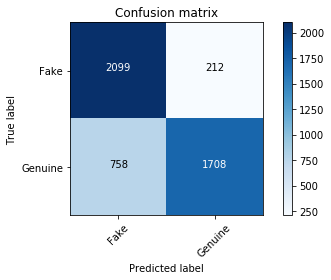

In [44]:
y_pred = spectral_clustering.fit_predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fake', 'Genuine'],
                      title='Confusion matrix')